# Imports

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Load Data

In [191]:
df = sns.load_dataset('titanic')

## Prepare Data

In [ ]:
df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']].dropna()

df['sex'] = df['sex'].map({'male': 0, 'female': 0})

In [193]:
X = df.drop('survived', axis=1)
y = df['survived']

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Train Logistic Regression Model

In [195]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

## Train Random Forest Model

In [196]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

## Print Error Metrics

Logistic Regression
Accuracy: 0.71
Precision: 0.67
Recall: 0.42
F1 Score: 0.51

Random Forest Classifier
Accuracy: 0.70
Precision: 0.60
Recall: 0.55
F1 Score: 0.57



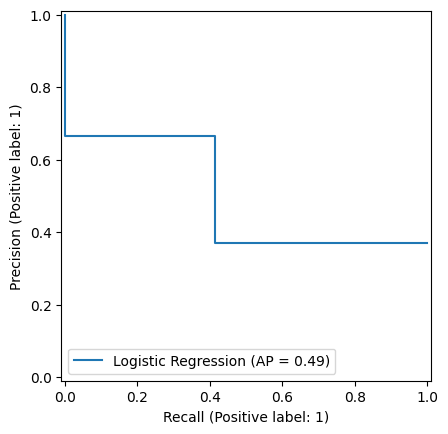

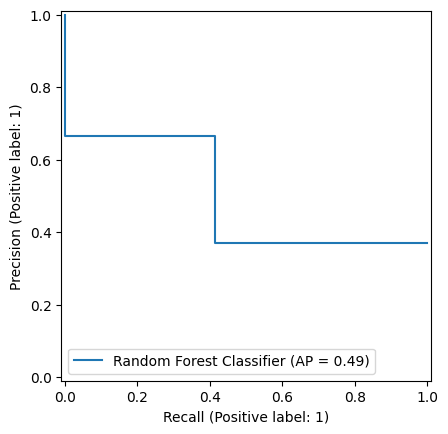

In [198]:
from sklearn.metrics import PrecisionRecallDisplay

def print_classification_metrics(name, y_true, y_pred):
    print(f"{name}")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.2f}\n")
    PrecisionRecallDisplay.from_predictions(y_test, y_pred_log, name=name)

print_classification_metrics("Logistic Regression", y_test, y_pred_log)
print_classification_metrics("Random Forest Classifier", y_test, y_pred_rf)